Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 0.9540 - val_loss: 0.8890
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8341 - val_loss: 0.8140
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.8756 - val_loss: 0.7284
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7910 - val_loss: 0.6307
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.7028 - val_loss: 0.5265
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.5263 - val_loss: 0.4262
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.4392 - val_loss: 0.3254
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.3684 - val_loss: 0.2406
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2826 - val_loss: 0.1794
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2171 - val_loss: 0.1310
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1849 - val_loss: 0.0971
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1243 - val_loss: 0.0770
Epoc

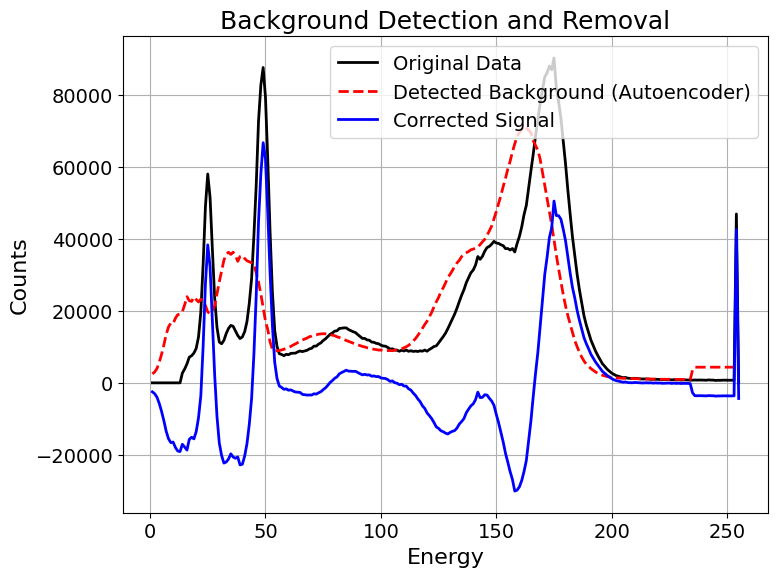

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the data
data = pd.read_csv('15.5.csv')
energy = data.iloc[:, 0].values
counts = data.iloc[:, 1].values

# Normalize the data
scaler = StandardScaler()
counts_scaled = scaler.fit_transform(counts.reshape(-1, 1)).flatten()

# Prepare the data for Autoencoder
def create_dataset(data, window_size=20):
    X = []
    for i in range(len(data) - window_size + 1):
        X.append(data[i:i + window_size])
    return np.array(X)

window_size = 20
X = create_dataset(counts_scaled, window_size)

# Split the data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Build the Autoencoder model
model = Sequential()
model.add(Input(shape=(window_size,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(window_size, activation='linear'))
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
model.fit(X_train, X_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Predict and reconstruct the data
X_reconstructed = model.predict(X)
reconstructed = np.mean(X_reconstructed, axis=1)

# Rescale the reconstructed data
reconstructed_rescaled = scaler.inverse_transform(reconstructed.reshape(-1, 1)).flatten()

# Adjust the length of the reconstructed background
def adjust_length(data, window_size):
    return np.concatenate([data, [data[-1]] * (len(counts) - len(data))])

background_full = adjust_length(reconstructed_rescaled, window_size)

# Corrected signal
corrected_signal = counts - background_full

# Visual settings
plt.rcParams.update({'font.size': 14, 'lines.linewidth': 3, 'axes.grid': True})

# Plot the results
plt.figure(figsize=(8, 6))

# Original data and detected background
plt.plot(energy, counts, label='Original Data', color='black', linewidth=2)
plt.plot(energy, background_full, label='Detected Background (Autoencoder)', color='red', linestyle='--', linewidth=2)
plt.plot(energy, corrected_signal, label='Corrected Signal', color='blue', linewidth=2)
plt.legend()
plt.xlabel('Energy', fontsize=16)
plt.ylabel('Counts', fontsize=16)
plt.title('Background Detection and Removal', fontsize=18)

plt.tight_layout()
plt.show()

